## Gaussian Process Regression

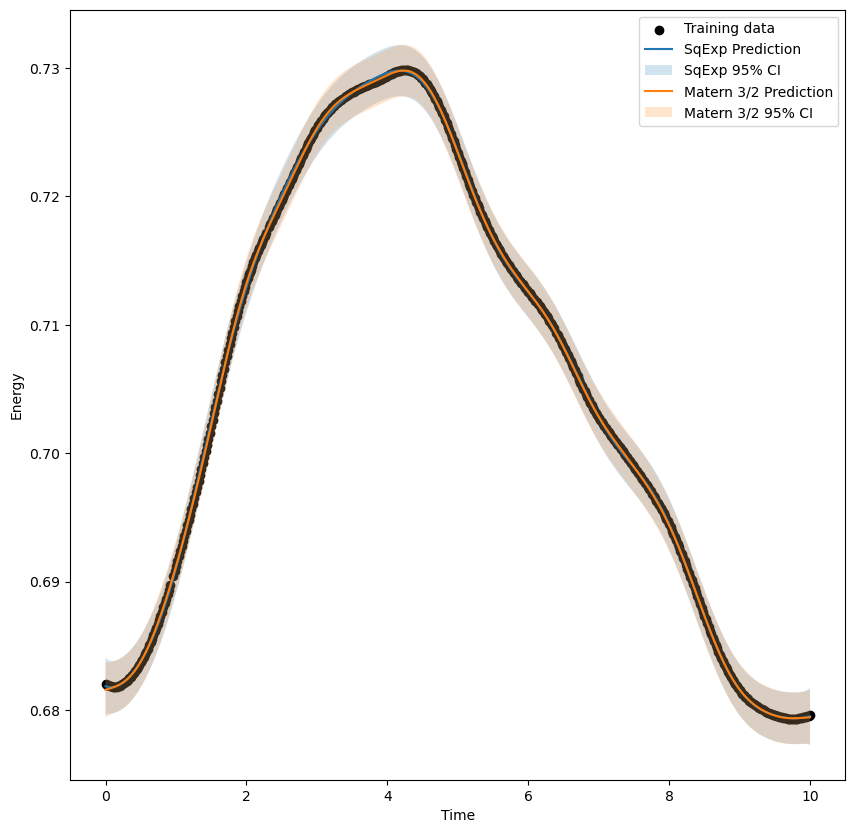

Optimal parameters for SqExp Kernel:
Tau (amplitude scale): 0.44244650864847995
L (length scale): 1.3560042204916083
Optimal parameters for Matern 3/2 Kernel:
Tau (amplitude scale): 0.44045404050179715
L (length scale): 40.39298154312106


In [139]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from numpy.linalg import cholesky, solve

def sqexp_kernel(a, b, tau, l):
    a = a.reshape(-1, 1)
    b = b.reshape(-1, 1)
    sqdist = (a - b.T)**2
    return tau ** 2 * np.exp(-0.5 * sqdist / (l ** 2))

def matern32_kernel(a, b, tau, l):
    a = a.reshape(-1, 1)
    b = b.reshape(-1, 1)
    abs_diff = np.abs(a - b.T)
    sqrt3 = np.sqrt(3)
    return tau ** 2 * (1 + sqrt3 * abs_diff / l) * np.exp(-sqrt3 * abs_diff / l)

def log_marginal_likelihood(kernel, params, x, y, noise_var):
    tau, l = params
    K = kernel(x, x, tau, l) + noise_var * np.eye(len(x))
    L = cholesky(K + 1e-6 * np.eye(len(K)))
    alpha = solve(L.T, solve(L, y))
    log_likelihood = -0.5 * np.dot(y.T, alpha)
    log_likelihood -= np.sum(np.log(np.diagonal(L)))
    log_likelihood -= len(x) / 2 * np.log(2 * np.pi)
    return -log_likelihood

def predict(kernel, x_pred, x, y, params, noise_var):
    tau, l = params
    K = kernel(x, x, tau, l) + noise_var * np.eye(len(x))
    K_s = kernel(x, x_pred, tau, l)
    K_ss = kernel(x_pred, x_pred, tau, l) + 1e-6 * np.eye(len(x_pred))
    L = cholesky(K + 1e-6 * np.eye(len(K)))
    Lk = solve(L, K_s)
    mu = np.dot(Lk.T, solve(L, y))
    S2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
    return mu, S2

data = np.loadtxt('DATA.dat.txt')
time_data = data[:, 0]
energy = data[:, 1]
np.random.seed(0)
train_indices = np.random.choice(len(time_data), 500, replace=False)
X_train = time_data[train_indices]
y_train = energy[train_indices]
init_params = np.array([1.0, 1.0])
noise_var = 0

res_sqexp = minimize(fun=lambda params: log_marginal_likelihood(sqexp_kernel, params, X_train, y_train, noise_var),
               x0=init_params, method='L-BFGS-B', bounds=((1e-5, None), (1e-5, None)))
opt_params_sqexp = res_sqexp.x

res_matern32 = minimize(fun=lambda params: log_marginal_likelihood(matern32_kernel, params, X_train, y_train, noise_var),
               x0=init_params, method='L-BFGS-B', bounds=((1e-5, None), (1e-5, None)))
opt_params_matern32 = res_matern32.x

time_pred = np.linspace(time_data.min(), time_data.max(), 500)
mu_sqexp, S2_sqexp = predict(sqexp_kernel, time_pred, X_train[:, np.newaxis], y_train, opt_params_sqexp, noise_var)
mu_matern32, S2_matern32 = predict(matern32_kernel, time_pred, X_train[:, np.newaxis], y_train, opt_params_matern32, noise_var)

plt.figure(figsize=(10,10))
plt.scatter(X_train, y_train, c='k', label='Training data')
plt.plot(time_pred, mu_sqexp, label='SqExp Prediction')
plt.fill_between(time_pred, mu_sqexp - 1.96 * np.sqrt(S2_sqexp), mu_sqexp + 1.96 * np.sqrt(S2_sqexp), alpha=0.2, label='SqExp 95% CI')

plt.plot(time_pred, mu_matern32, label='Matern 3/2 Prediction')
plt.fill_between(time_pred, mu_matern32 - 1.96 * np.sqrt(S2_matern32), mu_matern32 + 1.96 * np.sqrt(S2_matern32), alpha=0.2, label='Matern 3/2 95% CI')
# plt.title('Gaussian Process Regression with Different Kernels')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()
plt.show()

# Optimal parameters for the Squared Exponential Kernel
print("Optimal parameters for SqExp Kernel:")
print("Tau (amplitude scale):", opt_params_sqexp[0])
print("L (length scale):", opt_params_sqexp[1])

# Optimal parameters for the Matérn 3/2 Kernel
print("Optimal parameters for Matern 3/2 Kernel:")
print("Tau (amplitude scale):", opt_params_matern32[0])
print("L (length scale):", opt_params_matern32[1])


## To show difference between Kernel predictions

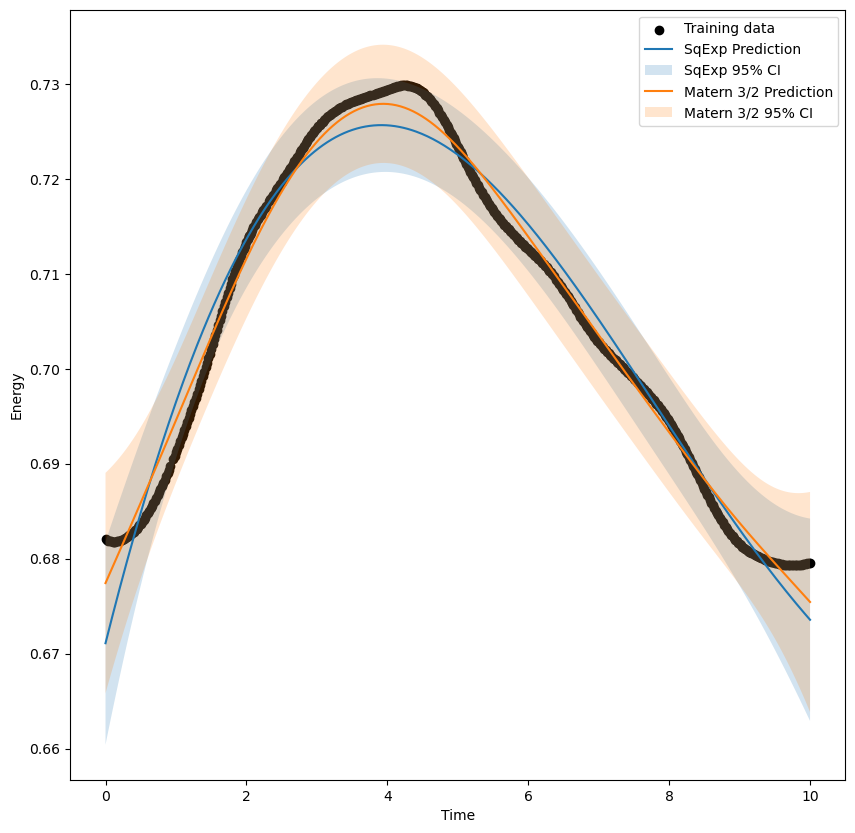

Optimal parameters for SqExp Kernel:
Tau (amplitude scale): 0.5317601875895325
L (length scale): 10.875476924883909
Optimal parameters for Matern 3/2 Kernel:
Tau (amplitude scale): 0.5245775390084948
L (length scale): 47.87767290488549


In [140]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from numpy.linalg import cholesky, solve

def sqexp_kernel(a, b, tau, l):
    a = a.reshape(-1, 1)
    b = b.reshape(-1, 1)
    sqdist = (a - b.T)**2
    return tau ** 2 * np.exp(-0.5 * sqdist / (l ** 2))

def matern32_kernel(a, b, tau, l):
    a = a.reshape(-1, 1)
    b = b.reshape(-1, 1)
    abs_diff = np.abs(a - b.T)
    sqrt3 = np.sqrt(3)
    return tau ** 2 * (1 + sqrt3 * abs_diff / l) * np.exp(-sqrt3 * abs_diff / l)

def log_marginal_likelihood(kernel, params, x, y, noise_var):
    tau, l = params
    K = kernel(x, x, tau, l) + noise_var * np.eye(len(x))
    L = cholesky(K + 1e-6 * np.eye(len(K)))
    alpha = solve(L.T, solve(L, y))
    log_likelihood = -0.5 * np.dot(y.T, alpha)
    log_likelihood -= np.sum(np.log(np.diagonal(L)))
    log_likelihood -= len(x) / 2 * np.log(2 * np.pi)
    return -log_likelihood

def predict(kernel, x_pred, x, y, params, noise_var):
    tau, l = params
    K = kernel(x, x, tau, l) + noise_var * np.eye(len(x))
    K_s = kernel(x, x_pred, tau, l)
    K_ss = kernel(x_pred, x_pred, tau, l) + 1e-6 * np.eye(len(x_pred))
    L = cholesky(K + 1e-6 * np.eye(len(K)))
    Lk = solve(L, K_s)
    mu = np.dot(Lk.T, solve(L, y))
    S2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
    return mu, S2

data = np.loadtxt('DATA.dat.txt')
time_data = data[:, 0]
energy = data[:, 1]
np.random.seed(0)
train_indices = np.random.choice(len(time_data), 500, replace=False)
X_train = time_data[train_indices]
y_train = energy[train_indices]
init_params = np.array([1.0, 1.0])
noise_var = 1e-3

res_sqexp = minimize(fun=lambda params: log_marginal_likelihood(sqexp_kernel, params, X_train, y_train, noise_var),
               x0=init_params, method='L-BFGS-B', bounds=((1e-5, None), (1e-5, None)))
opt_params_sqexp = res_sqexp.x

res_matern32 = minimize(fun=lambda params: log_marginal_likelihood(matern32_kernel, params, X_train, y_train, noise_var),
               x0=init_params, method='L-BFGS-B', bounds=((1e-5, None), (1e-5, None)))
opt_params_matern32 = res_matern32.x

time_pred = np.linspace(time_data.min(), time_data.max(), 500)
mu_sqexp, S2_sqexp = predict(sqexp_kernel, time_pred, X_train[:, np.newaxis], y_train, opt_params_sqexp, noise_var)
mu_matern32, S2_matern32 = predict(matern32_kernel, time_pred, X_train[:, np.newaxis], y_train, opt_params_matern32, noise_var)

plt.figure(figsize=(10,10))
plt.scatter(X_train, y_train, c='k', label='Training data')
plt.plot(time_pred, mu_sqexp, label='SqExp Prediction')
plt.fill_between(time_pred, mu_sqexp - 1.96 * np.sqrt(S2_sqexp), mu_sqexp + 1.96 * np.sqrt(S2_sqexp), alpha=0.2, label='SqExp 95% CI')

plt.plot(time_pred, mu_matern32, label='Matern 3/2 Prediction')
plt.fill_between(time_pred, mu_matern32 - 1.96 * np.sqrt(S2_matern32), mu_matern32 + 1.96 * np.sqrt(S2_matern32), alpha=0.2, label='Matern 3/2 95% CI')
# plt.title('Gaussian Process Regression with Different Kernels')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()
plt.show()

# Optimal parameters for the Squared Exponential Kernel
print("Optimal parameters for SqExp Kernel:")
print("Tau (amplitude scale):", opt_params_sqexp[0])
print("L (length scale):", opt_params_sqexp[1])

# Optimal parameters for the Matérn 3/2 Kernel
print("Optimal parameters for Matern 3/2 Kernel:")
print("Tau (amplitude scale):", opt_params_matern32[0])
print("L (length scale):", opt_params_matern32[1])


## Stochastic Variational Inference for Gaussian Process Regression

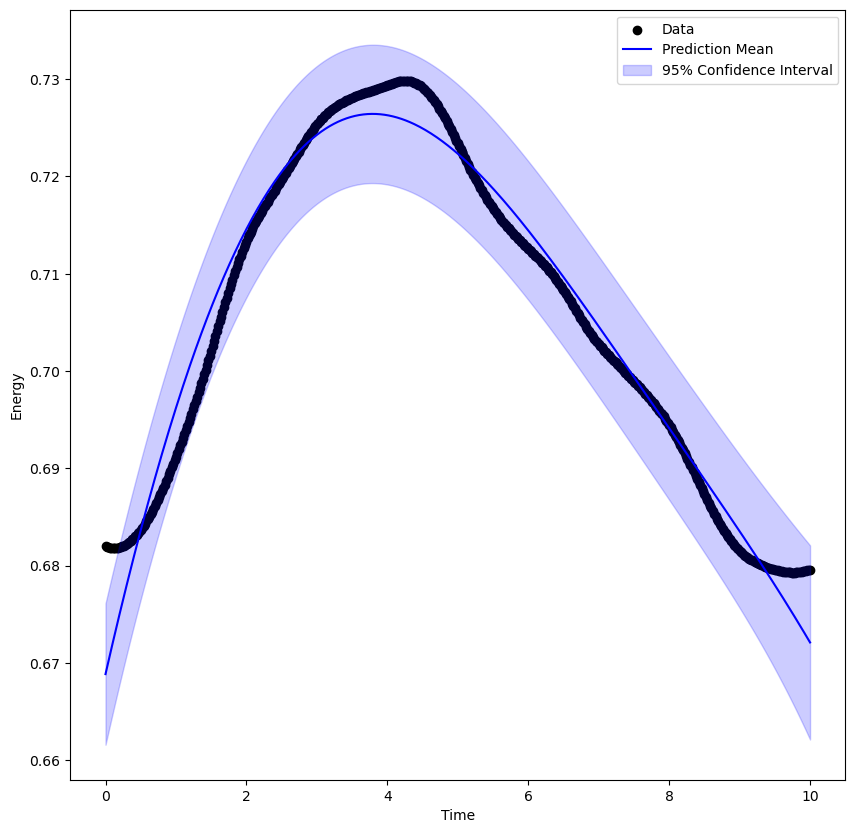

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import gpflow
from gpflow.models import SVGP
from gpflow.kernels import SquaredExponential
from gpflow.likelihoods import Gaussian
from gpflow.optimizers import Scipy

data = np.loadtxt('DATA.dat.txt')
X_train = data[:, 0][:, None]  
Y_train = data[:, 1][:, None]  

X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float64)
Y_train_tf = tf.convert_to_tensor(Y_train, dtype=tf.float64)
data_tf = (X_train_tf, Y_train_tf)

kernel = SquaredExponential()
likelihood = Gaussian()
num_inducing_points = 100
Z = np.linspace(X_train.min(), X_train.max(), num_inducing_points)[:, None]

model = SVGP(kernel=kernel, likelihood=likelihood, inducing_variable=Z, num_data=len(X_train))
optimizer = Scipy()

@tf.function
def optimization_step():
    return -model.elbo(data_tf)  

optimizer.minimize(optimization_step, variables=model.trainable_variables, options=dict(maxiter=100))
mean, var = model.predict_y(X_train_tf)


plt.figure(figsize=(10,10))
plt.scatter(X_train.ravel(), Y_train.ravel(), c='k', label='Data')
plt.plot(X_train.ravel(), mean.numpy().ravel(), color='blue', label='Prediction Mean')
plt.fill_between(X_train.ravel(),
                 (mean - 1.96 * np.sqrt(var)).numpy().ravel(),
                 (mean + 1.96 * np.sqrt(var)).numpy().ravel(),
                 color='blue', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Time')  
plt.ylabel('Energy')
plt.legend()
# plt.title('SVGP Regression')
plt.show()


## SVGPR with Inducing points

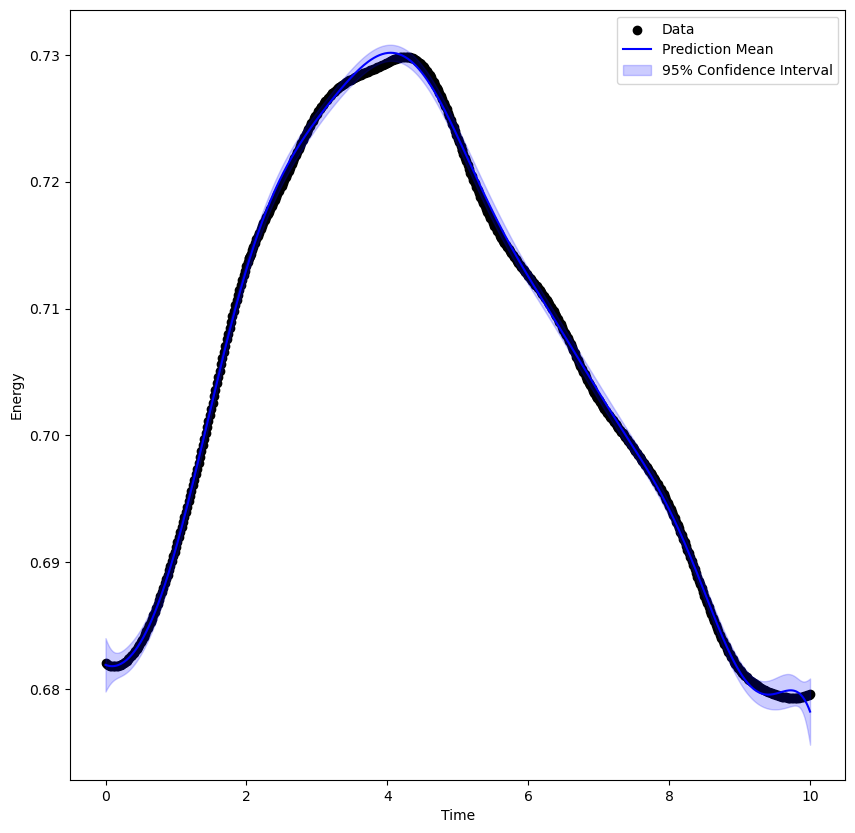

Number of Inducing Points: 100, MSE: 1.7388253253582684e-07


In [142]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.linalg import cholesky, solve_triangular, solve
from numpy.linalg import inv

def kernel(a, b, tau, l):
    a = a.reshape(-1, 1)
    b = b.reshape(-1, 1)
    sqdist = (a - b.T)**2
    return tau ** 2 * np.exp(-0.5 * sqdist / (l ** 2))

def stable_cholesky(K):
    jitter = 1e-6
    while True:
        try:
            L = cholesky(K, lower=True)
            return L
        except np.linalg.LinAlgError:
            K = K + jitter * np.eye(K.shape[0])
            jitter *= 10

data = np.loadtxt('DATA.dat.txt')
X_train = data[:, 0][:, None]
Y_train = data[:, 1][:, None]
N = len(X_train)
num_inducing_points = 100
np.random.seed(0)
inducing_indices = np.random.choice(X_train.shape[0], num_inducing_points, replace=False)
inducing_points = X_train[inducing_indices]
inducing_targets = Y_train[inducing_indices]
lengthscale = 0.0025
variance = 4.3
m = np.zeros(num_inducing_points)
S = np.eye(num_inducing_points)
params = np.concatenate([np.array([lengthscale, variance]), m, S[np.triu_indices(num_inducing_points)]])

def elbo(params, X, Y, Z):
    lengthscale, variance = params[0], params[1]
    m = params[2:2+len(Z)].flatten()
    S_flat = params[2+len(Z):]
    S = np.zeros((len(Z), len(Z)))
    S[np.triu_indices(len(Z))] = S_flat
    S = S + S.T - np.diag(np.diag(S))
    Kmm = kernel(Z, Z, lengthscale, variance) + np.eye(len(Z)) * 1e-6
    Kmn = kernel(Z, X, lengthscale, variance)
    L = stable_cholesky(Kmm)
    Kmm_inv = inv(Kmm)
    Kmn_Kmm_inv = np.dot(Kmn.T, Kmm_inv)
    Sigma = S + Kmm
    Sigma_inv = inv(Sigma)
    log_likelihood = -0.5 * Y.T.dot(Y) + 0.5 * Y.T.dot(Kmn_Kmm_inv).dot(m)
    KL = 0.5 * (np.trace(Sigma_inv.dot(Kmm)) - len(Z) + m.dot(Sigma_inv).dot(m)
                - np.linalg.slogdet(Kmm)[1] + np.linalg.slogdet(Sigma)[1])
    
    return -(log_likelihood - KL)

def optimize_elbo(params, X, Y, Z):
    result = minimize(elbo, params, args=(X, Y, Z), method='L-BFGS-B', options={'maxiter': 100, 'disp': False})
    return result.x

optimized_params = optimize_elbo(params, X_train, Y_train, inducing_points)
lengthscale_opt, variance_opt = optimized_params[0], optimized_params[1]

Knn = kernel(X_train, X_train, variance_opt, lengthscale_opt)
Knm = kernel(X_train, inducing_points, variance_opt, lengthscale_opt)
Kmm_opt = kernel(inducing_points, inducing_points, variance_opt, lengthscale_opt)
L_opt = stable_cholesky(Kmm_opt)
alpha = solve_triangular(L_opt.T, solve_triangular(L_opt, inducing_targets, lower=True))

X_pred = np.linspace(X_train.min(), X_train.max(), 500)[:, np.newaxis]
Knm_pred = kernel(X_pred, inducing_points, variance_opt, lengthscale_opt)
mean_pred = Knm_pred.dot(alpha)

Knn_pred = kernel(X_pred, X_pred, variance_opt, lengthscale_opt) 
v = solve_triangular(L_opt, Knm_pred.T, lower=True)
var_pred = np.diag(Knn_pred) - np.sum(v ** 2, axis=0)

mean_pred = mean_pred.flatten()  
std_pred = 1.96 * np.sqrt(var_pred) 

plt.figure(figsize=(10,10))
plt.scatter(X_train, Y_train, c='k', label='Data')
plt.plot(X_pred.flatten(), mean_pred, color='blue', label='Prediction Mean')
plt.fill_between(X_pred.flatten(), (mean_pred - std_pred), (mean_pred + std_pred), color='blue', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Time')  
plt.ylabel('Energy')
plt.legend()
# plt.title('SVGP Regression')
plt.show()

Knm_train = kernel(X_train, inducing_points, variance_opt, lengthscale_opt)
mean_train_pred = Knm_train.dot(alpha)
mse_train = np.mean((Y_train.flatten() - mean_train_pred.flatten())**2)
print(f'Number of Inducing Points: {num_inducing_points}, MSE: {mse_train}')

## SVGPR with Mini-Batch Inducing points

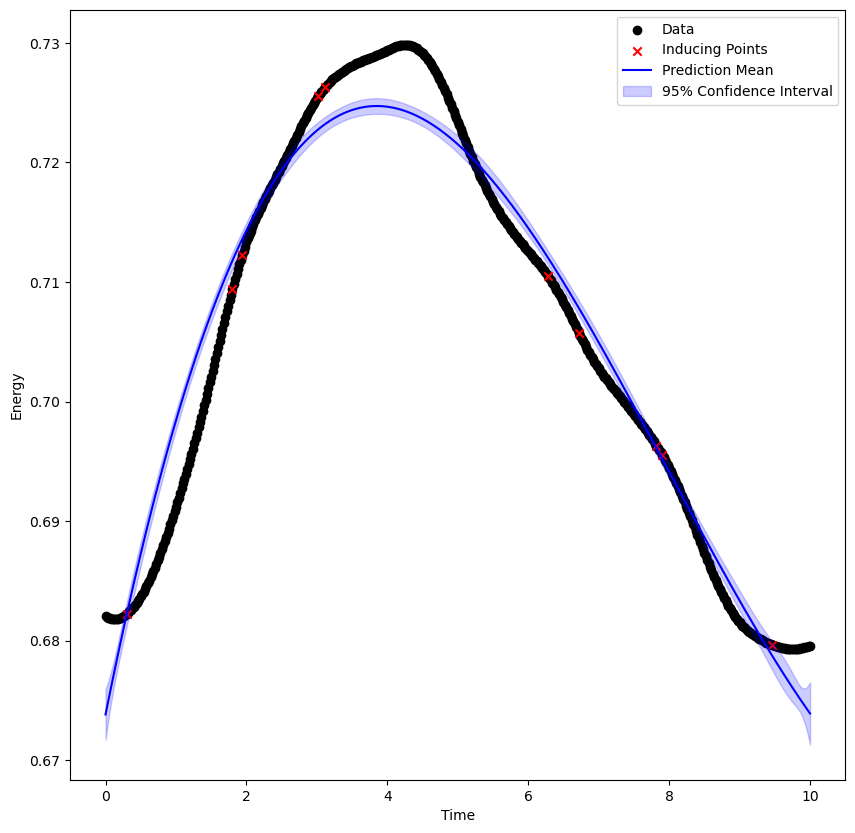

Number of Inducing Points: 10, MSE: 1.075487797251055e-05


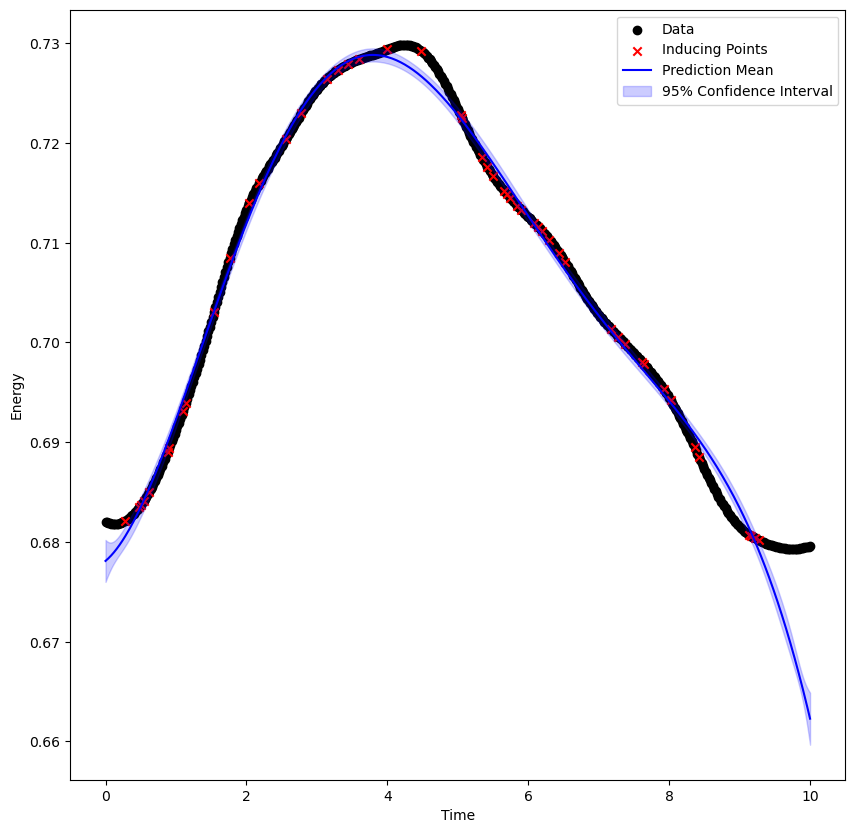

Number of Inducing Points: 50, MSE: 7.883129663696905e-06


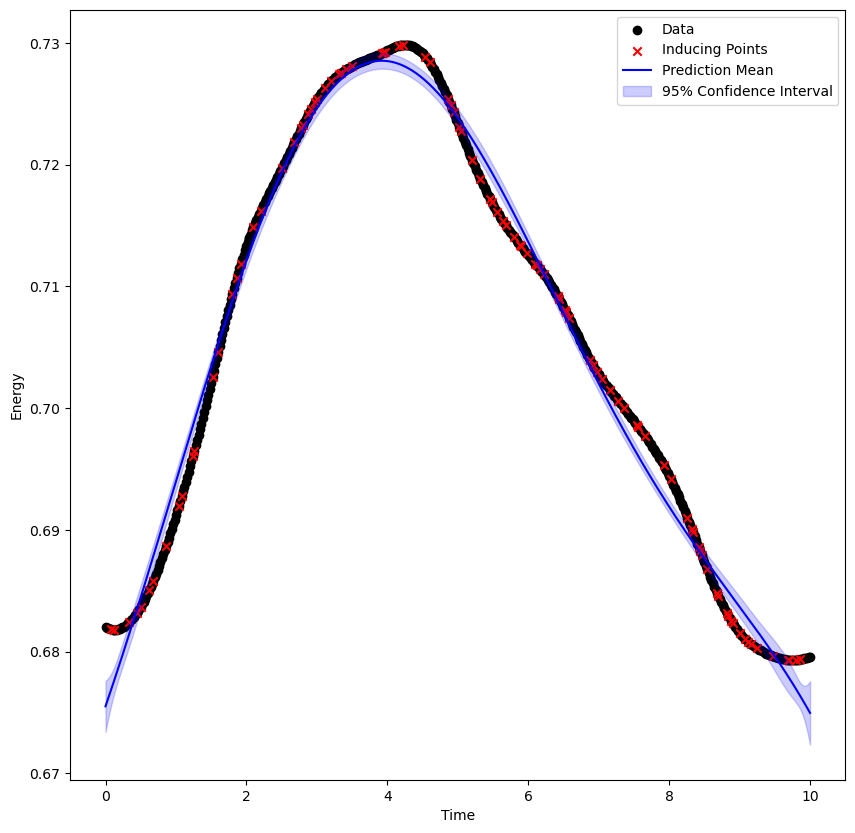

Number of Inducing Points: 100, MSE: 2.967561074100843e-06


In [143]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.linalg import cholesky, solve_triangular
from numpy.linalg import inv

def kernel(a, b, tau, l):
    a = a.reshape(-1, 1)
    b = b.reshape(-1, 1)
    sqdist = (a - b.T)**2
    return tau ** 2 * np.exp(-0.5 * sqdist / l**2)

def stable_cholesky(K):
    jitter = 1e-6
    while True:
        try:
            L = cholesky(K, lower=True)
            return L
        except np.linalg.LinAlgError:
            K += jitter * np.eye(K.shape[0])
            jitter *= 10

data = np.loadtxt('DATA.dat.txt')
X_train = data[:, 0][:, None]
Y_train = data[:, 1][:, None]

np.random.seed(0)
lengthscale = 0.0025
variance = 4.3

num_inducing_points_options = [10, 50, 100]

for num_inducing_points in num_inducing_points_options:
    inducing_indices = np.random.choice(X_train.shape[0], num_inducing_points, replace=False)
    inducing_points = X_train[inducing_indices]
    inducing_targets = Y_train[inducing_indices]
    
    m = np.zeros(num_inducing_points)
    S = np.eye(num_inducing_points)
    params = np.concatenate([np.array([lengthscale, variance]), m, S[np.triu_indices(num_inducing_points)]])
    
    def elbo(params, X, Y, Z):
        lengthscale, variance = params[0], params[1]
        m = params[2:2+len(Z)].flatten()
        S_flat = params[2+len(Z):]
        S = np.zeros((len(Z), len(Z)))
        S[np.triu_indices(len(Z))] = S_flat
        S = S + S.T - np.diag(np.diag(S))
        Kmm = kernel(Z, Z, lengthscale, variance) + np.eye(len(Z)) * 1e-6
        Kmn = kernel(Z, X, lengthscale, variance)
        L = stable_cholesky(Kmm)
        Kmm_inv = inv(Kmm)
        Kmn_Kmm_inv = np.dot(Kmn.T, Kmm_inv)
        Sigma = S + Kmm
        Sigma_inv = inv(Sigma)
        log_likelihood = -0.5 * Y.T.dot(Y) + 0.5 * Y.T.dot(Kmn_Kmm_inv).dot(m)
        KL = 0.5 * (np.trace(Sigma_inv.dot(Kmm)) - len(Z) + m.dot(Sigma_inv).dot(m)
                    - np.linalg.slogdet(Kmm)[1] + np.linalg.slogdet(Sigma)[1])

        return -(log_likelihood - KL)
    
    def optimize_elbo(params, X, Y, Z):
        result = minimize(elbo, params, args=(X, Y, Z), method='L-BFGS-B', options={'maxiter': 100, 'disp': False})
        return result.x

    optimized_params = optimize_elbo(params, X_train, Y_train, inducing_points)
    lengthscale_opt, variance_opt = optimized_params[0], optimized_params[1]
    
    Kmm_opt = kernel(inducing_points, inducing_points, variance_opt, lengthscale_opt) + np.eye(num_inducing_points) * 1e-6
    L_opt = stable_cholesky(Kmm_opt)
    alpha = solve_triangular(L_opt.T, solve_triangular(L_opt, inducing_targets, lower=True))
    
    X_pred = np.linspace(X_train.min(), X_train.max(), 500)[:, np.newaxis]
    Knm_pred = kernel(X_pred, inducing_points, variance_opt, lengthscale_opt)
    mean_pred = Knm_pred.dot(alpha)
    
    mean_pred = mean_pred.flatten()  
    std_pred = 1.96 * np.sqrt(var_pred) 

    plt.figure(figsize=(10,10))
    plt.scatter(X_train, Y_train, c='k', label='Data')
    plt.scatter(inducing_points, inducing_targets, c='red', marker='x', label='Inducing Points')
    plt.plot(X_pred.flatten(), mean_pred, color='blue', label='Prediction Mean')
    plt.fill_between(X_pred.flatten(), (mean_pred - std_pred), (mean_pred + std_pred), color='blue', alpha=0.2, label='95% Confidence Interval')
    plt.xlabel('Time')  
    plt.ylabel('Energy')
    plt.legend()
    # plt.title('SVGP Regression')
    plt.show()

    Knm_train = kernel(X_train, inducing_points, variance_opt, lengthscale_opt)
    mean_train_pred = Knm_train.dot(alpha)
    mse_train = np.mean((Y_train.flatten() - mean_train_pred.flatten())**2)
    print(f'Number of Inducing Points: {num_inducing_points}, MSE: {mse_train}')
